In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

outlines:
1. intro
2. rectangular rule
3. trapezoidal rule
4. simpson's rule
5. gauss rule



# Numerical Quadrature
Numerical quadrature, or numerical integration, is commonly used when the integrals are very difficult or even impossible to solve analytically. For example, one of the most commonly used function, the error function $erf(x) = \frac{2}{\pi}\int_0^x e^{t^2}dt$, has been proved to have no analytical form of solution. We need methods from numerical analysis to evaluate such integrals. 

We also need the algorithms when the integrand of the integral to be evaluated does not have an analytical form. For example, we may need to calculate the volume of a reservoir from seismic horizons, or to obtain accumulative production volume of a well from daily production rate measurement. 

In general, numeric integration means the numeric evaluation of integrals
$$
J = \int_a^b f(x)dx
$$
where $a$ and $b$ are given and $f$ is a function given analytically by a formula or empirically by a table of values. 
Geometrically, $J$ is the area under the curve of $f$ between $a$ and $b$. 

<img src="files/figs/figure440.png" width="300">

## Rectangular Rule
Rectangular rule is the simplest way to perform the numerical integration. It requires subdividing the interval of integration $a\leq x \leq b$ into $n$ subintervals of equal length $h=(b-a)/n$, and in each subinterval approximate $f$ by the constant $f(x^*_j)$, which is the value of $f$ at the midpoint $x_j^*$ of the $j$th subinteval. 
In this way, $f$ is approximated by a **step function** (piecewise constant function), and the $n$ rectangles have the areas $f(x_j^*)h$. The rectangular rule can be presented as:
$$
J = \int_a^b f(x)dx \approx h \sum_{i=1}^{n} f(x_i^*) 
$$
where $x_i^* = a + (i-1/2)h$.


<img src="files/figs/figure441.png" width="400">

### Python example of rectangular rule
Let's calculate a simple integration using rectangular rule:
$$\int_{-1}^1 (1-x^2) dx .$$
As we already know, this integral has the analytic solution as:
$$
\int_{-1}^1 (1-x^2) dx =
\left. x-\frac{x^3}{3} \right|_{-1}^{+1} = \frac{4}{3}
$$


In [44]:
int_fun = lambda x:x-x**3/3
int_fun(b)-int_fun(a)

1.3333333333333335

1.3518518518518516


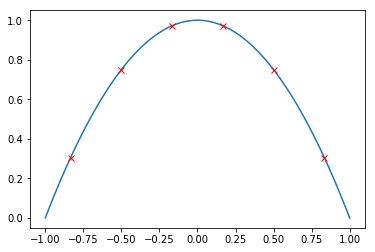

In [47]:
fun = lambda x:1-x**2
a = -1; b = 1
x = np.linspace(a,b,100)
y = fun(x)
N = 6
h = (b-a)/N
xi = a+(np.arange(N)+0.5)*h
yi = fun(xi)
result = np.sum(yi)*h
print(result)

plt.figure()
plt.plot(x,y)
plt.plot(xi,yi,'rx')
plt.show()


1.2962962962962963


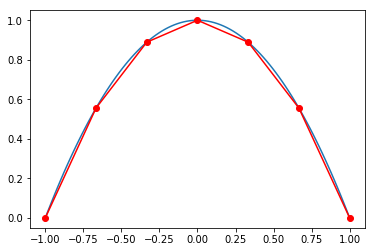

In [48]:
h = (b-a)/N
xi = a+(np.arange(N+1))*h
yi = fun(xi)
result = ((np.sum(yi)-yi[0]*0.5-yi[-1]*0.5)*h)
print(result)
plt.figure()
plt.plot(x,y)
plt.plot(xi,yi,'ro-')
plt.show()

In [58]:
s0 = yi[0]+yi[-1]
s1 = np.sum(yi[1:-1:2])
s2 = np.sum(yi[2:-2:2])
result = h/3*(s0+4*s1+2*s2)
result

1.3333333333333333